In [8]:
# Import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#To fix UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 76763: invalid continuation byte, chardet library is used and the result dictionary will contain the detected encoding, which then used in the pd.read_csv function.
import chardet

# Detect the encoding
with open('Resources/IMDb Movies India.csv', 'rb') as file:
    result = chardet.detect(file.read())

print(result)


{'encoding': 'ISO-8859-1', 'confidence': 0.7299889142069536, 'language': ''}


In [10]:
# Get the data ready
import pandas as pd
encoding = result['encoding']
movie_data = pd.read_csv('Resources/IMDb Movies India.csv', encoding=encoding)
# Display the first few rows
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Check for missing values
print(movie_data.isna().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [12]:
print(movie_data.dtypes)

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


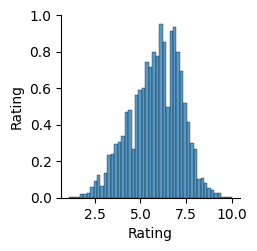

In [13]:
# Visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(movie_data[['Year', 'Rating', 'Votes']])
plt.show()


In [16]:
# Creating a copy of the dataframe
movie_data.set_index

# Displaying the first few rows of the dataset
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [17]:
movie_data_cleaned = movie_data.copy()
# Filling missing values using the assign method
movie_data_cleaned = (movie_data_cleaned
                      .assign(Year=movie_data_cleaned['Year'].fillna(movie_data_cleaned['Year'].mode()[0]))
                      .assign(Duration=movie_data_cleaned['Duration'].fillna(movie_data_cleaned['Duration'].mode()[0]))
                      .assign(Genre=movie_data_cleaned['Genre'].fillna(movie_data_cleaned['Genre'].mode()[0]))
                      .assign(Rating=movie_data_cleaned['Rating'].fillna(movie_data_cleaned['Rating'].mean()))
                      .assign(Votes=movie_data_cleaned['Votes'].fillna(movie_data_cleaned['Votes'].mode()[0]))
                      .assign(Director=movie_data_cleaned['Director'].fillna(movie_data_cleaned['Director'].mode()[0]))
                      .assign(Actor_1=movie_data_cleaned['Actor 1'].fillna(movie_data_cleaned['Actor 1'].mode()[0]))
                      .assign(Actor_2=movie_data_cleaned['Actor 2'].fillna(movie_data_cleaned['Actor 2'].mode()[0]))
                      .assign(Actor_3=movie_data_cleaned['Actor 3'].fillna(movie_data_cleaned['Actor 3'].mode()[0])))

# Verifying missing values
print(movie_data_cleaned.isnull().sum())


Name           0
Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director       0
Actor 1     1617
Actor 2     2384
Actor 3     3144
Actor_1        0
Actor_2        0
Actor_3        0
dtype: int64


In [18]:
# One-hot encoding for categorical variables
movie_data_encoded = pd.get_dummies(movie_data_cleaned, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

# Displaying the first few rows of the encoded dataset
print(movie_data_encoded.head())


                                 Name    Year Duration    Rating Votes  \
0                                      (2019)  120 min  5.841621     8   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min  7.000000     8   
2                         #Homecoming  (2021)   90 min  5.841621     8   
3                             #Yaaram  (2019)  110 min  4.400000    35   
4                   ...And Once Again  (2010)  105 min  5.841621     8   

        Actor_1             Actor_2          Actor_3  Genre_Action, Adventure  \
0      Manmauji              Birbal  Rajendra Bhatia                    False   
1  Rasika Dugal      Vivek Ghamande    Arvind Jangid                    False   
2  Sayani Gupta   Plabita Borthakur       Roy Angana                    False   
3       Prateik          Ishita Raj  Siddhant Kapoor                    False   
4  Rajat Kapoor  Rituparna Sengupta      Antara Mali                    False   

   Genre_Action, Adventure, Biography  ...  Actor 3_Zeenat Aman  \
0

In [19]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = movie_data_encoded.drop(['Name', 'Rating'], axis=1)
y = movie_data_encoded['Rating']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
import pandas as pd

# Importing data
movie_data = pd.read_csv('Resources/IMDb Movies India.csv', encoding='ISO-8859-1')
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)


ValueError: could not convert string to float: '(1996)'